<strong>NOTE**if tou are willing to run this notebook using <span style="color:#eda633">Google colab</span>;<br>make sure to change 'dataset.next()' to -> next(dataset)</strong>.

# imports
> all imports needed.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optimizer
import torch.nn.functional as functional

import matplotlib.pyplot as plt 
import numpy as np
from random import randrange

import torchvision
from torchvision import transforms as transform

# Hyper parameters
> - Neurons: a list of the structure for the intended network.
> - Epochs: number times that the learning algorithm will work through the entire training dataset.
> - Batch size: number of samples that will be propagated through the network.
> - Learning rate: the adjustment of the weights for our network with respect the loss gradient.
> - Data path: the path where dataset is stored.
> - model path: the place where model will be saved.  

Change parameters as you want to see it's effect on results.

In [13]:
# Hyper-prameters
neurons = [28*28, 120, 84, 10]
EPOCHS = 5
batch_size = 10
lr =0.01
data_path = 'datasets/'
trained_model_path = 'mnist_net.pth'

# loading data

In [3]:
def dataset_loader(path=data_path, shuffle=True):
    """
    used to load dataset.
    -> return value is a tuple of (training_data, testing_data).
    """
    train_data = torchvision.datasets.MNIST(
        root=path,
        train=True,
        transform=transform.ToTensor(),
        download=True)
    test_data = torchvision.datasets.MNIST(
        root=path,
        train=False,
        transform=transform.ToTensor(),
        download=True)
    train_loader = torch.utils.data.DataLoader(
        dataset=train_data,
        batch_size=batch_size,
        shuffle=shuffle)
    test_loader = torch.utils.data.DataLoader(
        dataset=test_data,
        batch_size=batch_size,
        shuffle=shuffle)
    return train_loader, test_loader

trainig, testing = dataset_loader()

# Sample Viewer
use this function to view a sample using matplotlib.

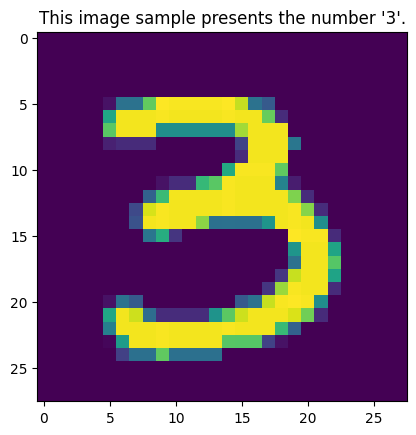

In [4]:
def sample_viewer(dataset, index=None):
    """
    use it view one sample of the dataset either (training or testing samples based on what parameter you pass). 
    by defult it shows a randome training sample, set an index and triggre 'train' to change the behavior.
    """
    dataset = iter(dataset)
    imgs, labels = dataset.next()
    if index==None: index=randrange(0, len(imgs)) 
    plt.title(f"This image sample presents the number '{labels[index]}'.")
    plt.imshow(np.transpose(imgs[index], (1, 2, 0)))
    plt.show()

sample_viewer(trainig)
# sample_viewer(testing)   # uncomment this line for test sample veiw 

# Network bulider 

In [20]:
def network_builder(archtechture):
    """
    Neural network archtechture.
    return value is -> (network_instence, loss_function, opimizer_instence)
    """
    model_layers=[nn.Flatten(1, -1)]
    for index, lay in enumerate(archtechture):
        if index+1<len(archtechture):
            model_layers.append(nn.Linear(lay, archtechture[index+1]))
            model_layers.append(nn.ReLU())
        else:
            model_layers.pop()
    net_ins = nn.Sequential(*model_layers)
    return net_ins, nn.CrossEntropyLoss(), optimizer.SGD(net_ins.parameters(), lr=lr)

net, loss_fun, optim =  network_builder(neurons)

# network trainer 

In [21]:
def network_trainer(network, loss_fun, optimizer, training_data, model_root=trained_model_path):
    """
    used to train a given network, after trainging a ".pth" file will be a generated.
    """
    print("Training...")
    for epoch in range(EPOCHS):
        batch_counter = 1
        for batch in training_data:
            print(f"epoch {epoch+1}/{EPOCHS}    batch {batch_counter}/{len(training_data)}")
            img_sample, labels = batch

            optimizer.zero_grad()
            outputs = network(img_sample)
            loss = loss_fun(outputs, labels)
            loss.backward()
            optimizer.step()

            batch_counter+=1
    print("\n^DONE^\n")
    torch.save(network.state_dict(), model_root)

network_trainer(network=net,
                loss_fun=loss_fun,
                optimizer=optim,
                training_data=trainig)

Training...
epoch 1/5    batch 1/6000
epoch 1/5    batch 2/6000
epoch 1/5    batch 3/6000
epoch 1/5    batch 4/6000
epoch 1/5    batch 5/6000
epoch 1/5    batch 6/6000
epoch 1/5    batch 7/6000
epoch 1/5    batch 8/6000
epoch 1/5    batch 9/6000
epoch 1/5    batch 10/6000
epoch 1/5    batch 11/6000
epoch 1/5    batch 12/6000
epoch 1/5    batch 13/6000
epoch 1/5    batch 14/6000
epoch 1/5    batch 15/6000
epoch 1/5    batch 16/6000
epoch 1/5    batch 17/6000
epoch 1/5    batch 18/6000
epoch 1/5    batch 19/6000
epoch 1/5    batch 20/6000
epoch 1/5    batch 21/6000
epoch 1/5    batch 22/6000
epoch 1/5    batch 23/6000
epoch 1/5    batch 24/6000
epoch 1/5    batch 25/6000
epoch 1/5    batch 26/6000
epoch 1/5    batch 27/6000
epoch 1/5    batch 28/6000
epoch 1/5    batch 29/6000
epoch 1/5    batch 30/6000
epoch 1/5    batch 31/6000
epoch 1/5    batch 32/6000
epoch 1/5    batch 33/6000
epoch 1/5    batch 34/6000
epoch 1/5    batch 35/6000
epoch 1/5    batch 36/6000
epoch 1/5    batch 37/600

# view a predictioon 

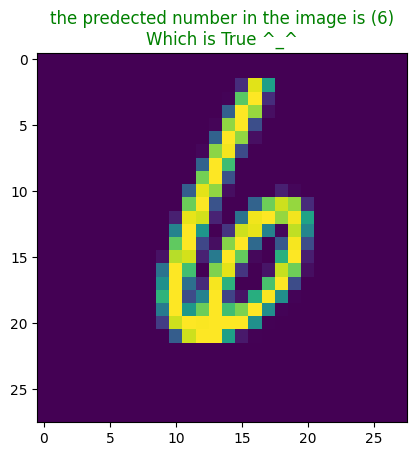

In [7]:
def network_prediction(network, testing_data, model_root=trained_model_path):
    """
    """
    network.load_state_dict(torch.load(model_root))
    test_sampels = iter(testing_data)
    imges, labels = test_sampels.next()
    results = network(imges[0])
    _, predicted = torch.max(results, 1)
    color = 'red'
    title = f'the predected number in the image is ({int(predicted)})\nBUT! desired number is ({labels[0]})'
    if predicted==labels[0]: 
        color='green'
        title= f'the predected number in the image is ({int(predicted)})\nWhich is True ^_^'
    plt.title(title, color=color)
    plt.imshow(np.transpose(imges[0], (1, 2, 0)))
    plt.show()

network_prediction(network=net, testing_data=testing)

# calcilate accuracy

In [24]:
def accuracy_evalutor(network, testing_data):
    # Measure accuracy for each class
    correct_pred = 0
    
    with torch.no_grad():
        for data in testing_data:
            images, labels = data
            
            outputs = network(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction: correct_pred+= 1
    accuracy = (correct_pred/len(testing.dataset))* 100
    loss = round(100-accuracy, 2)
    print(f'Accuracy of the network on the {len(testing.dataset)} test images:{accuracy}% -> Loss:{loss}')

accuracy_evalutor(network=net, testing_data=testing)

SyntaxError: f-string: empty expression not allowed (2473542425.py, line 16)